In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset taken for x1 and x2 range from 0 to 30 and 100 data has taken.The output is 0,1,2 three class

x1+x2<=10,0 x1+x2<=15,1 x1+x2<=20,2

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DatasetNN.csv')
df.head()

,x1,x2,Class
0,13,19,2
1,22,10,2
2,7,0,0
3,6,14,2
4,10,13,2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Text(0, 0.5, 'y-axis')

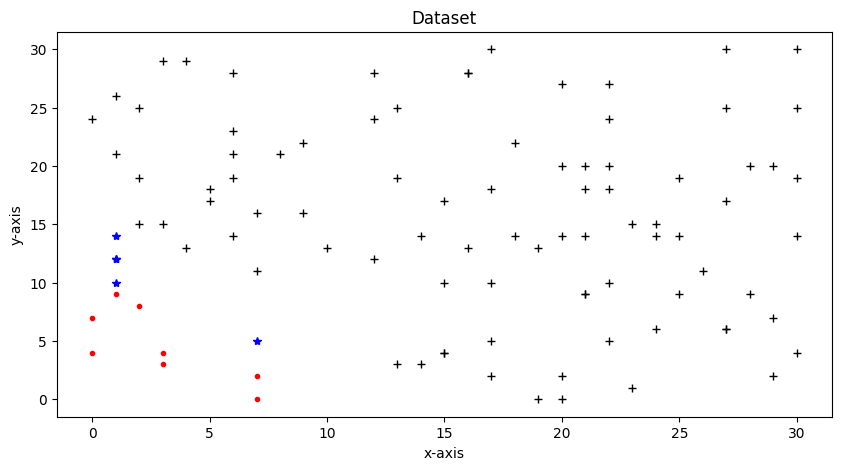

In [ ]:
x1=df["x1"].values.tolist()
x2=df["x2"].values.tolist()
Y =df["Class"].values.tolist()
plt.figure(figsize=(10,5))
plt.title("Dataset")
for i in range(len(Y)):
  if Y[i]==0:
    plt.plot(x1[i],x2[i],label="class 0",marker=".",color="red")
  elif Y[i]==1:
    plt.plot(x1[i],x2[i],label="class 1",marker="*",color="blue")
  else:
    plt.plot(x1[i],x2[i],label="class 2",marker="+",color="black")
plt.xlabel("x-axis")
plt.ylabel("y-axis")


In [ ]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons=2
    hiddenLayerNeurons1=20
    hiddenLayerNeurons2=20
    hiddenLayerNeurons3=20
    outputLayerNeurons=3

    self.learning_rate=0.01
    self.W_IH=np.random.randn(inputLayerNeurons,hiddenLayerNeurons1)
    self.W_HH1=np.random.randn(hiddenLayerNeurons1,hiddenLayerNeurons2)
    self.W_HH2=np.random.randn(hiddenLayerNeurons2,hiddenLayerNeurons3)
    self.W_HO=np.random.randn(hiddenLayerNeurons3,outputLayerNeurons)


  def softmax(self,X):
    exps=np.exp(X-np.max(X,axis=1,keepdims=True))
    return exps/np.sum(exps,axis=1,keepdims=True)

  def relu(self,X,der=False):
    if der:
        return np.where(X>0,1,0)
    else:
        return np.maximum(0,X)

  def feedForward(self,X):
    input_hidden=np.dot(X,self.W_IH)
    self.input_hidden_output=self.relu(input_hidden)

    hidden_hidden1=np.dot(self.input_hidden_output,self.W_HH1)
    self.hidden_hidden1_output=self.relu(hidden_hidden1)

    hidden1_hidden2=np.dot(self.hidden_hidden1_output,self.W_HH2)
    self.hidden1_hidden2_output=self.relu(hidden1_hidden2)

    hidden2_output=np.dot(self.hidden1_hidden2_output,self.W_HO)
    prediction=self.softmax(hidden2_output)
    return prediction


  def backPropogation(self,X,Y,prediction):
    output_error=prediction-Y

    hidden3_error=np.dot(output_error,self.W_HO.T)
    hidden3_delta=hidden3_error*self.relu(self.hidden1_hidden2_output,der=True)

    hidden2_error=np.dot(hidden3_delta,self.W_HH2.T)
    hidden2_delta=hidden2_error*self.relu(self.hidden_hidden1_output,der=True)

    hidden1_error=np.dot(hidden2_delta,self.W_HH1.T)
    hidden1_delta=hidden1_error*self.relu(self.input_hidden_output,der=True)

    self.W_HO-=self.learning_rate*np.dot(self.hidden1_hidden2_output.T,output_error)
    self.W_HH2-=self.learning_rate*np.dot(self.hidden_hidden1_output.T,hidden3_delta)
    self.W_HH1-=self.learning_rate*np.dot(self.input_hidden_output.T,hidden2_delta)
    self.W_IH -=self.learning_rate*np.dot(X.T,hidden1_delta)

  def train(self,X,Y):
    prediction=self.feedForward(X)
    self.backPropogation(X,Y,prediction)
    loss=-np.mean(np.sum(Y*np.log(prediction+1e-9),axis=1))
    return loss



In [ ]:
X=np.array(list(zip(x1,x2)))
num_classes=3
Y_onehot=np.zeros((len(Y),num_classes))
for i, label in enumerate(Y):
    Y_onehot[i,label]=1

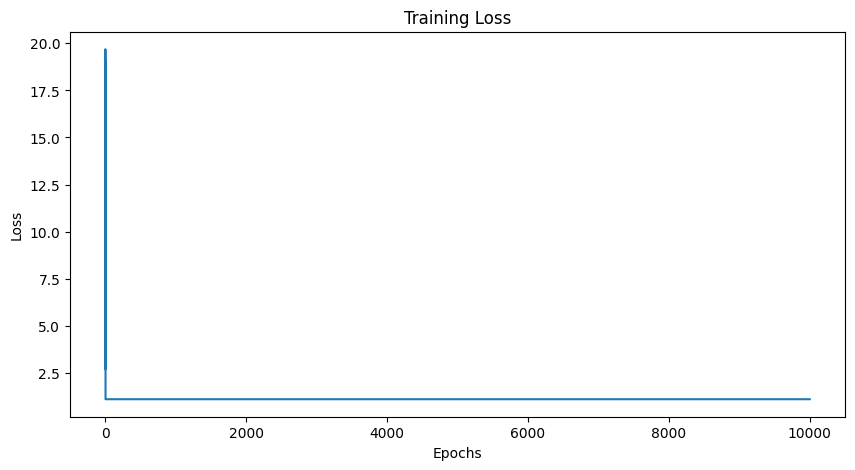

In [ ]:
NN=NeuralNetwork()
loss_history=[]
for i in range(10000):
    loss=NN.train(X,Y_onehot)
    loss_history.append(loss)
plt.figure(figsize=(10,5))
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


